Text(0.5, 1.0, 'Exemplo: prestigio\\7-03-V1-B.png')

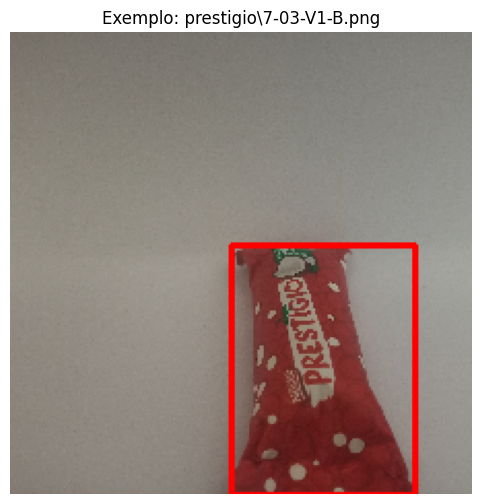

In [224]:
# === Célula: Visualizar imagem aleatória com bounding box ===
import os
import random
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Parâmetros
pasta_aug      = "../dataset_aug"
csv_bboxes     = "../dataset_segm/bboxes.csv"
ignorar_augX   = False  # True para pular arquivos com '_aug', False para incluir

# Lê CSV de bounding boxes
df = pd.read_csv(csv_bboxes)

# Filtra se necessário
if ignorar_augX:
    df = df[~df['filename'].str.contains(r'_aug\d+')]

# Escolhe uma linha aleatória
sample = df.sample(n=1).iloc[0]
fname, x, y, w, h = sample['filename'], sample['x'], sample['y'], sample['w'], sample['h']

# Reconstrói caminho da imagem no dataset_aug
# fname ex.: classe/00-01-V1-B_aug2_mask.png -> remove "_mask.png"
base = fname.replace("_mask.png", "")
class_dir, stem = os.path.split(base)
pasta_classe = os.path.join(pasta_aug, class_dir)
# Busca arquivo original que comece com stem
candidates = [f for f in os.listdir(pasta_classe) if f.startswith(stem) and not f.endswith("_mask.png")]
img_path = os.path.join(pasta_classe, candidates[0])

# Carrega imagem e desenha bounding box
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.rectangle(img_rgb, (x, y), (x + w, y + h), color=(255, 0, 0), thickness=2)

# Exibe resultado
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"Exemplo: {os.path.join(class_dir, candidates[0])}")
